In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
Dataset=pd.read_csv("winequality-red.csv")

In [3]:
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###  we can use this for classification problem by changing like this

In [4]:

Dataset['QualityCat']=['good' if Dataset.iloc[i,11] >6.5 else 'bad' for i in Dataset.index]

In [5]:
Dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityCat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


### consider Regression

In [6]:
X=Dataset.iloc[:,:-2]
Y=Dataset[['quality']]

In [7]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


### EDA & Feature Engineering

In [9]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


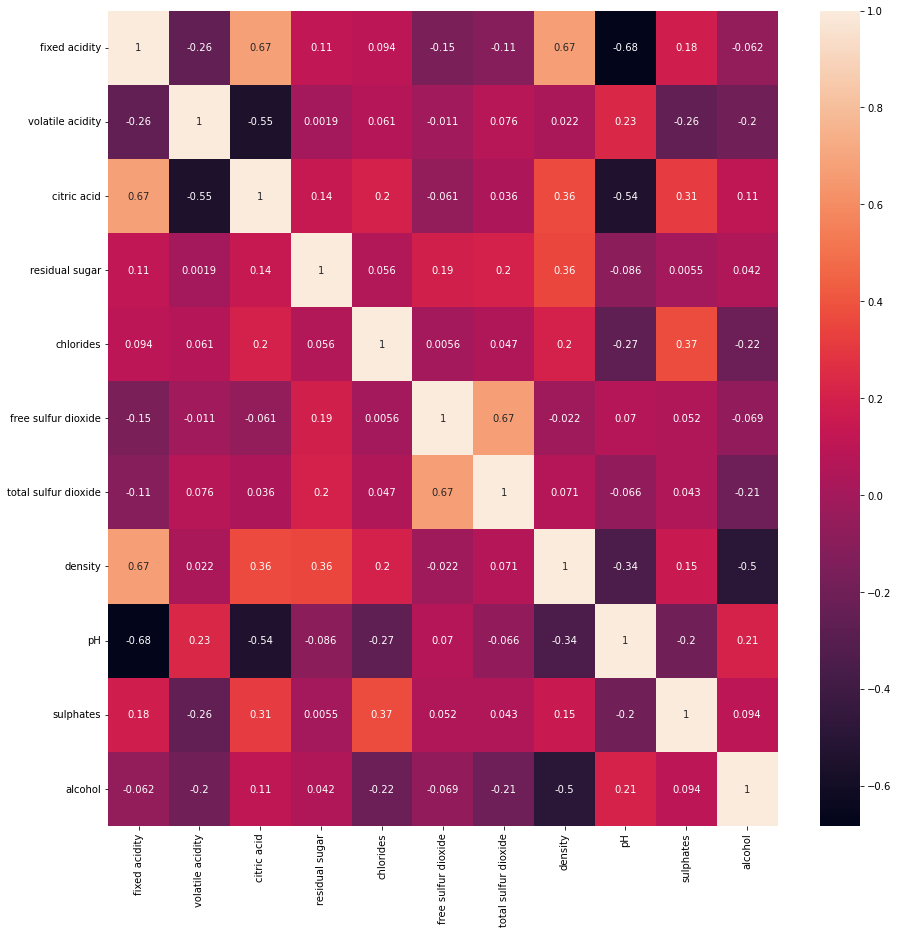

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)
plt.show()

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\keert\anaconda3\lib\si

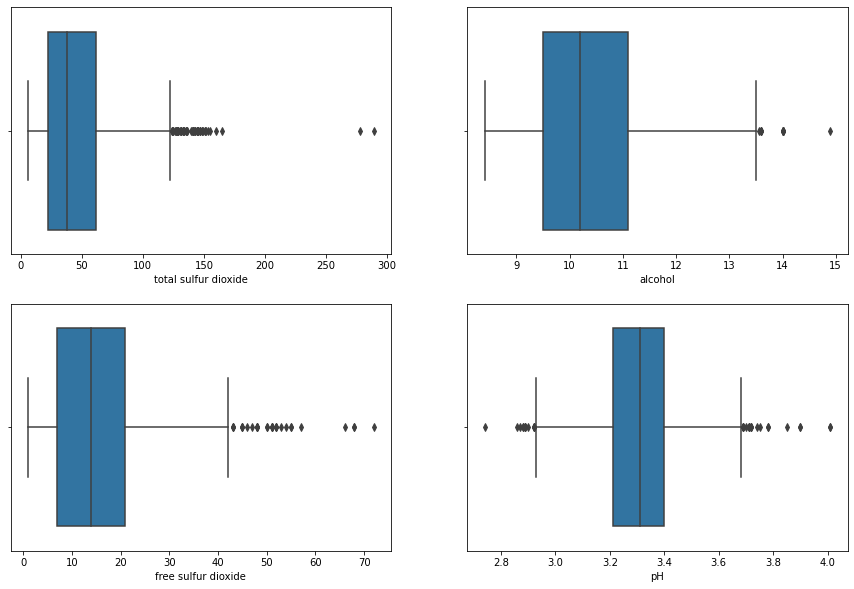

In [11]:
fig,axs=plt.subplots(2,2,figsize=(15,10))
sns.boxplot(X['total sulfur dioxide'],ax=axs[0,0])
sns.boxplot(X['free sulfur dioxide'],ax=axs[1,0])
sns.boxplot(X['alcohol'],ax=axs[0,1])
sns.boxplot(X['pH'],ax=axs[1,1])
plt.show()

In [12]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [13]:
# we can see here some fetatures correlated more than 60% , if we want , we can take one of those 

C:\Users\keert\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


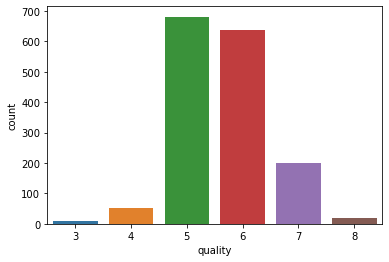

In [14]:
sns.countplot(Y['quality'])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
X_train=sc.fit_transform(X_train)

In [19]:
X_test=sc.fit_transform(X_test)

### Build Neural network

In [44]:
Ann=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=X_test[0].shape),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear'),
])

In [45]:
Ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse','mae'])

In [46]:
Ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [47]:
modelHistory=Ann.fit(X_train,Y_train,validation_split=0.2,epochs=30,callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/30
32/32 [==============================] - 0s 6ms/step - loss: 23.0158 - mse: 23.0158 - mae: 4.6356 - val_loss: 12.5511 - val_mse: 12.5511 - val_mae: 3.3189
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 6.1724 - mse: 6.1724 - mae: 2.1066 - val_loss: 4.4656 - val_mse: 4.4656 - val_mae: 1.5195
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 2.7113 - mse: 2.7113 - mae: 1.2909 - val_loss: 2.7923 - val_mse: 2.7923 - val_mae: 1.2496
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 2.1306 - mse: 2.1306 - mae: 1.1617 - val_loss: 2.3069 - val_mse: 2.3069 - val_mae: 1.1576
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 1.8690 - mse: 1.8690 - mae: 1.0768 - val_loss: 2.0224 - val_mse: 2.0224 - val_mae: 1.0938
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 1.6777 - mse: 1.6777 - mae: 1.0190 - val_loss: 1.8339 - val_mse: 1.8339 - val_mae: 1.0490
Epoch 7/30
32/32 [======

In [48]:
Ann.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 880us/step - loss: 0.4648 - mse: 0.4648 - mae: 0.5090


[0.46476030349731445, 0.46476030349731445, 0.5089837312698364]

In [49]:
X_test[0].reshape(-1,1)

array([[ 1.44653617],
       [-0.29922497],
       [ 0.8557103 ],
       [-0.31177699],
       [ 1.85999559],
       [ 1.15377518],
       [ 0.74096015],
       [ 0.785065  ],
       [-0.93785052],
       [ 0.72205872],
       [ 0.31519731]])

In [55]:
np.concatenate((Ann.predict(X_test),Y_test),axis=1)

10/10 [==============================] - 0s 889us/step


array([[5.09006453, 6.        ],
       [5.04750681, 5.        ],
       [6.7813983 , 7.        ],
       [4.8411622 , 6.        ],
       [5.87883568, 5.        ],
       [5.84051418, 6.        ],
       [4.91399431, 5.        ],
       [6.03140783, 6.        ],
       [4.50035906, 4.        ],
       [5.28100586, 5.        ],
       [4.90054512, 5.        ],
       [5.30587292, 5.        ],
       [5.16938829, 6.        ],
       [5.84923744, 5.        ],
       [5.7665205 , 6.        ],
       [5.99525023, 6.        ],
       [7.39881611, 7.        ],
       [5.2852931 , 5.        ],
       [5.4064641 , 5.        ],
       [5.23708439, 4.        ],
       [6.17109203, 7.        ],
       [4.76869059, 6.        ],
       [5.90757132, 6.        ],
       [7.47073507, 4.        ],
       [5.89412117, 6.        ],
       [4.67475319, 5.        ],
       [5.62005138, 5.        ],
       [6.62417507, 7.        ],
       [4.92415667, 5.        ],
       [6.50625944, 6.        ],
       [6.

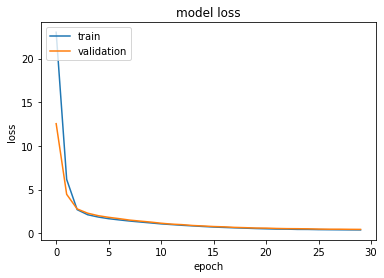

In [51]:
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

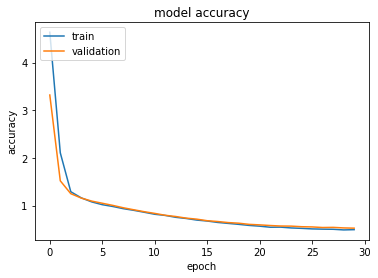

In [53]:
plt.plot(modelHistory.history['mae'])
plt.plot(modelHistory.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()